In [1]:
# Creating, writing and reading NWB file

# Packages
import numpy
import pynwb
from pynwb import NWBFile, TimeSeries, get_manager

from pynwb.form.backends.hdf5 import HDF5IO
from pynwb.form.build import GroupBuilder, DatasetBuilder
from pynwb.form.spec import NamespaceCatalog
from pynwb.spec import NWBGroupSpec, NWBDatasetSpec, NWBNamespace


from pynwb.base import ProcessingModule
from pynwb.misc import UnitTimes, SpikeUnit
from pynwb.ecephys import ElectrodeGroup, Device
from pynwb.epoch import EpochTimeSeries, Epoch
from pynwb.image import ImageSeries
from pynwb.core import set_parents
from pynwb import *

In [2]:
# Variables

import numpy as np

np.random.seed(1234)
print("np.random.seed(1234) = ", np.random.seed(1234))

###################
# ElectricalSeries
###################

data_len = 10 # 1000
print("data_len = ", data_len)
    
ephys_data = np.random.rand(data_len)
print("ephys_data = ", ephys_data)

rate = 10.0
print("rate = ", rate)
ephys_timestamps = np.arange(data_len) / rate
print("ephys_timestamps = ", ephys_timestamps)

###################
# SpatialSeries
###################

spatial_timestamps = ephys_timestamps[::10] # In def SpatialSeries
print("spatial_timestamps = ", spatial_timestamps)

spatial_data = np.cumsum(np.random.normal(size=(2, len(spatial_timestamps))), axis=-1).T  # In def SpatialSeries
print("spatiam_data = ", spatial_data)


np.random.seed(1234) =  None
data_len =  10
ephys_data =  [ 0.19151945  0.62210877  0.43772774  0.78535858  0.77997581  0.27259261
  0.27646426  0.80187218  0.95813935  0.87593263]
rate =  10.0
ephys_timestamps =  [ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]
spatial_timestamps =  [ 0.]
spatiam_data =  [[ 0.01569637 -2.24268495]]


In [3]:
# Creating the NWBFile

from datetime import datetime
from pynwb import NWBFile

start_time = datetime(1970, 1, 1, 12, 0, 0)
print("start_time = ", start_time)
file_create_date = datetime.now()
print("file_create_date = ", file_create_date)
print("   ")
            
f = NWBFile('the PyNWB tutorial', 'my first NWB File', 'EXAMPLE_test_NWBFile', start_time,
            source='source of the file',
            session_description='session description of NWB File',
            identifier='identifier of NWB File',
            file_create_date=datetime.now(),
            experimenter='Dr. Elodie',
            lab='UNIC Laboratory',
            institution='University of Paris Sud',
            experiment_description='Experiment description of NWB File',
            session_id='Session id of NWB File')
print("f = ", f)

start_time =  1970-01-01 12:00:00
file_create_date =  2018-11-22 15:01:23.743552
   
f =  <pynwb.file.NWBFile object at 0x7f5b1c586c18>


In [4]:
# Write the NWB File to the disk using the HDF5IO class

from pynwb import get_manager
from pynwb.form.backends.hdf5 import HDF5IO

filename = "my_example_NWB_File.nwb"
io = NWBHDF5IO(filename, manager=get_manager(), mode='w')

print("io = ", io)
print("filename = ", filename)

io =  <pynwb.NWBHDF5IO object at 0x7f5b1c610ef0>
filename =  my_example_NWB_File.nwb


In [5]:
#######################################
# Extracellular electrophysiology data
#######################################

# Creating Electrode Groups

# Need to provide some information about the device that was used to record from the electrode
device = f.create_device(name='trodes_rig123', source="a source")
print("device = ", device)
print("   ")

# Creation of the ElectrodeGroup
###electrode_name = 'tetrode1'
electrode_name = 'electrode_name'
source = "an hypothetical source"
description = "an example tetrode dsecription"
location = "somewhere in the hippocampus"

channel_description = ['channel1', 'channel2', 'channel3', 'channel4']
num_channels = len(channel_description)
channel_description = ['channel1', 'channel2', 'channel3', 'channel4']
channel_location = ['CA1'] * num_channels
channel_filtering = ['no filtering'] * num_channels
channel_coordinates = [(2.0, 2.0, 2.0)] * num_channels
channel_impedance = [-1] * num_channels


electrode_group = f.create_electrode_group(electrode_name,
                                           source=source,
                                           description=description,
                                           location=location,
                                           device=device,
                                           channel_description=channel_description,
                                           channel_location=channel_location,
                                           channel_filtering=channel_filtering,
                                          )

print("electrode_group = ", electrode_group)
print("electrode_group.name = ", electrode_group.name)
print("electrode_group.location = ", electrode_group.location)
print("electrode_group.device = ", electrode_group.device)
print("********electrode_group.__nwbfields__ = ", electrode_group.__nwbfields__)

print("channel_description = ", channel_description)
print("channel_location = ", channel_location)
print("num_channels = ", num_channels)
print("   ")

device =  <pynwb.ecephys.Device object at 0x7f5b1c505128>
   
electrode_group =  <pynwb.ecephys.ElectrodeGroup object at 0x7f5b1c505160>
electrode_group.name =  electrode_name
electrode_group.location =  somewhere in the hippocampus
electrode_group.device =  <pynwb.ecephys.Device object at 0x7f5b1c505128>
********electrode_group.__nwbfields__ =  ('source', 'help', 'name', 'description', 'location', 'device')
channel_description =  ['channel1', 'channel2', 'channel3', 'channel4']
channel_location =  ['CA1', 'CA1', 'CA1', 'CA1']
num_channels =  4
   


In [6]:
# Creation of the association of ElectrodeTable and ElectrodeTableRegion
# Useful for ElectricalSeries
# Example for 4 channels

for idx in [1, 2, 3, 4]:
    f.add_electrode(idx,
                    x=1.0, y=2.0, z=3.0,
                    imp=float(-idx),
                    ###location='CA1', 
                    location='location_electrode', 
                    filtering='none',
                    #rate=rate,
                    channel_description=channel_description,
                    description='channel %s' % idx, group=electrode_group)

    print("idx = ", idx) # index of a channel
    print("channel_description = ", channel_description)
    print("channel_location = ", channel_location)
    print("location = ", location)
    print("electrode_group = ", electrode_group)
    print("electrode_group.name = ", electrode_group.name)    
    print("electrode_group.location = ", electrode_group.location)
    print("electrode_group.device = ", electrode_group.device)    
    print("   ")
    
electrode_table_region = f.create_electrode_table_region([0, 2], 'the first and third electrodes')
print("electrode_table_region = ", electrode_table_region)

idx =  1
channel_description =  ['channel1', 'channel2', 'channel3', 'channel4']
channel_location =  ['CA1', 'CA1', 'CA1', 'CA1']
location =  somewhere in the hippocampus
electrode_group =  <pynwb.ecephys.ElectrodeGroup object at 0x7f5b1c505160>
electrode_group.name =  electrode_name
electrode_group.location =  somewhere in the hippocampus
electrode_group.device =  <pynwb.ecephys.Device object at 0x7f5b1c505128>
   
idx =  2
channel_description =  ['channel1', 'channel2', 'channel3', 'channel4']
channel_location =  ['CA1', 'CA1', 'CA1', 'CA1']
location =  somewhere in the hippocampus
electrode_group =  <pynwb.ecephys.ElectrodeGroup object at 0x7f5b1c505160>
electrode_group.name =  electrode_name
electrode_group.location =  somewhere in the hippocampus
electrode_group.device =  <pynwb.ecephys.Device object at 0x7f5b1c505128>
   
idx =  3
channel_description =  ['channel1', 'channel2', 'channel3', 'channel4']
channel_location =  ['CA1', 'CA1', 'CA1', 'CA1']
location =  somewhere in the h

In [7]:
print("electrode_group.__nwbfields__ = ", electrode_group.__nwbfields__)

electrode_group.__nwbfields__ =  ('source', 'help', 'name', 'description', 'location', 'device')


In [8]:
# Creating TimeSeries

from pynwb.ecephys import ElectricalSeries  # Extracellular electrophysiology data
from pynwb.ecephys import SpikeEventSeries  # Extracellular electrophysiology data
from pynwb.behavior import SpatialSeries    # SpatialSeries

###########################
# Extracellular recordings
# ElectricalSeries 
# SpikeEventSeries
###########################

# For writing continuous data, use the NWB ElectricalSeries
ephys_ts = ElectricalSeries('ephys_data',
                            'an hypothetical source',
                            ephys_data,
                            electrode_table_region,
                            timestamps=ephys_timestamps,
                            resolution=0.001,
                            comments="This data was randomly generated with numpy, using 1234 as the seed",
                            description="Random numbers generated with numpy.random.rand")
print("ephys_ts = ", ephys_ts)

f.add_acquisition(ephys_ts) 
print("   ")

################################
spatial_ts = SpatialSeries('spatial_timeseries',
                           'a stumbling rat',
                           spatial_data,
                           'origin on x,y-plane',
                           timestamps=spatial_timestamps,
                           resolution=0.1,
                           comments="This data was generated with numpy, using 1234 as the seed",
                           description="This 2D Brownian process generated with "
                                       "np.cumsum(np.random.normal(size=(2, len(spatial_timestamps))), axis=-1).T")
print("spatial_ts = ", spatial_ts)

f.add_acquisition(spatial_ts)
print("   ")

################################
ts = TimeSeries('timeseries', 'example_source_TimeSeries', list(range(100, 200, 10)), 'second',
                comments='This is a comment',
                #timestamps=list(range(10)),
                starting_time=0.3,
                rate=10000.,
                resolution=0.1)


print("ts = ", ts)
f.add_acquisition(ts)
print("   ")


#####################################################################################################
# Creating Epochs
# With timeseries [ts]

epoch_tags = ('example_epoch',)

ep1 = f.create_epoch(timeseries=[ts], source='an hypothetical source ep1', name='epoch1', start=1.0, stop=3.3, 
                     tags=epoch_tags,
                     description="the first test epoch"
               )
print("ep1 = ", ep1)


#####################################################################################################


source_ES='source'
data_ES=np.random.rand(23)
timestamp_ES=np.arange(23) / 10.
electrodes_ES=electrode_table_region ###
                
spike_ES = SpikeEventSeries('spike_event_series', 
                            source_ES, 
                            data_ES, 
                            timestamp_ES, 
                            electrodes_ES)

f.add_acquisition(spike_ES)
print("spike_ES = ", spike_ES)
print("spike_ES timestamps = ", spike_ES.timestamps)
print("   ")

created_mod = f.create_processing_module('created_mod', 'PyNWB tutorial', 'example module')
print("created_mod = ", created_mod)
print("   ")
print("created_mod.__nwbfields__ = ", created_mod.__nwbfields__)
print("created_mod.source = ", created_mod.source)
print("created_mod.help = ", created_mod.help)
print("created_mod.description = ", created_mod.description)
print("created_mod.containers = ", created_mod.containers)
print("created_mod.name = ", created_mod.name)
print("created_mod 2 = ", created_mod)


ephys_ts =  <pynwb.ecephys.ElectricalSeries object at 0x7f5b1c543a20>
   
spatial_ts =  <pynwb.behavior.SpatialSeries object at 0x7f5b1c543a90>
   
ts =  <pynwb.base.TimeSeries object at 0x7f5b1c543c18>
   
ep1 =  <pynwb.epoch.Epoch object at 0x7f5b1c543eb8>
spike_ES =  <pynwb.ecephys.SpikeEventSeries object at 0x7f5b1c543b70>
spike_ES timestamps =  [ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2]
   
created_mod =  <pynwb.base.ProcessingModule object at 0x7f5b1c543cc0>
   
created_mod.__nwbfields__ =  ('source', 'help', 'description', 'containers')
created_mod.source =  PyNWB tutorial
created_mod.help =  None
created_mod.description =  example module
created_mod.containers =  ()
created_mod.name =  created_mod
created_mod 2 =  <pynwb.base.ProcessingModule object at 0x7f5b1c543cc0>


In [9]:
# For writing spike data, we use the NWB SpikeEventSeries
raw_ts = f.acquisition
print ('outside loop: ', raw_ts) # SpikeEventSeries(NWBContainer)
print("   ")
print ('outside loop [0]: ', raw_ts[0])
print("   ")
print("   ")

for i in raw_ts:
        print("START")
        print("i = ", i)
        print("i.unit = ", i.unit)
        print("i.data = ", i.data)
        print("i.data[0] = ", i.data[0])
        print("   ")
        print("i.__nwbfields__ = ", i.__nwbfields__)
        print("   ")
        # To have directly the name of the fields and the values
        for item_ec in i.__nwbfields__ :
            if item_ec in i.fields:
                print(" %s = " %item_ec, i.fields[item_ec])
        print("END")

outside loop:  (<pynwb.ecephys.ElectricalSeries object at 0x7f5b1c543a20>, <pynwb.behavior.SpatialSeries object at 0x7f5b1c543a90>, <pynwb.base.TimeSeries object at 0x7f5b1c543c18>, <pynwb.ecephys.SpikeEventSeries object at 0x7f5b1c543b70>)
   
outside loop [0]:  <pynwb.ecephys.ElectricalSeries object at 0x7f5b1c543a20>
   
   
START
i =  <pynwb.ecephys.ElectricalSeries object at 0x7f5b1c543a20>
i.unit =  volt
i.data =  [ 0.19151945  0.62210877  0.43772774  0.78535858  0.77997581  0.27259261
  0.27646426  0.80187218  0.95813935  0.87593263]
i.data[0] =  0.191519450379
   
i.__nwbfields__ =  ('source', 'help', 'comments', 'description', 'data', 'resolution', 'conversion', 'unit', 'num_samples', 'timestamps', 'timestamps_unit', 'interval', 'starting_time', 'rate', 'rate_unit', 'control', 'control_description', 'ancestry', 'neurodata_type', 'help', 'electrodes')
   
 source =  an hypothetical source
 comments =  This data was randomly generated with numpy, using 1234 as the seed
 descript

In [10]:
from pynwb.icephys import CurrentClampSeries  # PatchClampSeries -> Intracellular electrode
from pynwb.icephys import IntracellularElectrode  # Intracellular electrode

data_len2 = 1000
iphys_data = np.random.rand(data_len2 * 2).reshape((data_len2, 2))

# IntracellularElectrode
iphys = IntracellularElectrode('icephys_data',
                            'an hypothetical source',
                            location='somewhere in the hippocampus',
                            resistance='Resistance icephys',
                            filtering='filtering icephys',
                            initial_access_resistance='Initial access resistance.',
                            device='device icephys',
                            seal='test seal',
                            slice='slice icephys',
                            description="Random numbers generated with numpy.random.rand",
                            )
print("iphys = ", iphys)
  

iphys_timestamps = np.arange(data_len2) / rate    # In def  ElectricalSeries
print("iphys_timestamps = ", iphys_timestamps)

# voltage
# Representing response from intracellular stimulus data -> CurrentClampSeries
test_current_clamp_series = CurrentClampSeries('test_current_clamp_series',
                            'an hypothetical current clamp series',
                            data=list(range(10)),
                            unit='SIunit',
                            electrode=iphys,
                            gain=10.,
                            bias_current=0.1,
                            bridge_balance=1.,
                            capacitance_compensation=0.01,  
                            timestamps=iphys_timestamps,
                            rate=10.,
                            )
print("test_current_clamp_series = ", test_current_clamp_series)

iphys =  <pynwb.icephys.IntracellularElectrode object at 0x7f5b1c543160>
iphys_timestamps =  [  0.    0.1   0.2   0.3   0.4   0.5   0.6   0.7   0.8   0.9   1.    1.1
   1.2   1.3   1.4   1.5   1.6   1.7   1.8   1.9   2.    2.1   2.2   2.3
   2.4   2.5   2.6   2.7   2.8   2.9   3.    3.1   3.2   3.3   3.4   3.5
   3.6   3.7   3.8   3.9   4.    4.1   4.2   4.3   4.4   4.5   4.6   4.7
   4.8   4.9   5.    5.1   5.2   5.3   5.4   5.5   5.6   5.7   5.8   5.9
   6.    6.1   6.2   6.3   6.4   6.5   6.6   6.7   6.8   6.9   7.    7.1
   7.2   7.3   7.4   7.5   7.6   7.7   7.8   7.9   8.    8.1   8.2   8.3
   8.4   8.5   8.6   8.7   8.8   8.9   9.    9.1   9.2   9.3   9.4   9.5
   9.6   9.7   9.8   9.9  10.   10.1  10.2  10.3  10.4  10.5  10.6  10.7
  10.8  10.9  11.   11.1  11.2  11.3  11.4  11.5  11.6  11.7  11.8  11.9
  12.   12.1  12.2  12.3  12.4  12.5  12.6  12.7  12.8  12.9  13.   13.1
  13.2  13.3  13.4  13.5  13.6  13.7  13.8  13.9  14.   14.1  14.2  14.3
  14.4  14.5  14.6  14.7  14.8 

In [11]:
io.write(f)
io.close()

In [12]:
# Read a NWB File
io = pynwb.NWBHDF5IO('my_example_NWB_File.nwb', mode='r') # My own NWB File
io.read_builder()

{'acquisition': {'images': {},
  'timeseries': {'ephys_data': {'comments': 'This data was randomly generated with numpy, using 1234 as the seed',
    'data': {'attributes': {'conversion': 1.0,
      'resolution': 0.001,
      'unit': 'volt'},
     'data': <HDF5 dataset "data": shape (10,), type "<f8">},
    'description': 'Random numbers generated with numpy.random.rand',
    'electrodes': {'attributes': {'description': 'the first and third electrodes',
      'help': 'a subset (i.e. slice or region) of an ElectrodeTable',
      'namespace': 'core',
      'neurodata_type': 'ElectrodeTableRegion'},
     'data': {'attributes': {'help': 'a table for storing data about extracellular electrodes',
       'namespace': 'core',
       'neurodata_type': 'ElectrodeTable'},
      'data': <HDF5 dataset "electrodes": shape (4,), type "|V60">},
     'region': <HDF5 region reference>},
    'help': 'Stores acquired voltage data from extracellular recordings',
    'namespace': 'core',
    'neurodata_type

In [13]:
container = io.read()
print("container = ", container)

container =  <pynwb.file.NWBFile object at 0x7f5b1c586b70>


In [14]:
print("container.__nwbfields__ = ", container.__nwbfields__)

container.__nwbfields__ =  ('source', 'help', 'experimenter', 'description', 'experiment_description', 'session_id', 'lab', 'institution', 'acquisition', 'stimulus', 'stimulus_template', 'ec_electrodes', 'ec_electrode_groups', 'ic_electrodes', 'imaging_planes', 'optogenetic_sites', 'modules', 'epochs', 'epoch_tags', 'devices')


In [15]:
print("container.acquisition = ", container.acquisition)
print("container.epochs = ", container.epochs)
print("   ")

for i in container.acquisition:
    print("i.__nwbfields__ = ", i.__nwbfields__)
    print("  ***   ")
    print("i.name = ", i.name)
    print("i.source = ", i.source)
    print("i.data[:] = ", i.data[:])
    print("i.resolution = ", i.resolution)
    print("i.conversion = ", i.conversion)
    print("i.timestamps = ", i.timestamps)
    print("i.starting_time = ", i.starting_time)
    print("i.rate = ", i.rate)
    print("i.comments = ", i.comments)
    print("i.description = ", i.description)
    print("i.control = ", i.control)
    print("i.control_description = ", i.control_description)
    print("i.unit = ", i.unit) 
    print("*** parent ***)")
    print("i.parent = ", i.parent)   
    print("i.parent.name = ", i.parent.name)
    print("i.neurodata_type = ", i.neurodata_type)
    print("   ")

container.acquisition =  (<pynwb.ecephys.ElectricalSeries object at 0x7f5b1c543f28>, <pynwb.behavior.SpatialSeries object at 0x7f5b1c543048>, <pynwb.ecephys.SpikeEventSeries object at 0x7f5b1c543c50>, <pynwb.base.TimeSeries object at 0x7f5b1c543470>)
container.epochs =  {'epoch1': <pynwb.epoch.Epoch object at 0x7f5b1c543be0>}
   
i.__nwbfields__ =  ('source', 'help', 'comments', 'description', 'data', 'resolution', 'conversion', 'unit', 'num_samples', 'timestamps', 'timestamps_unit', 'interval', 'starting_time', 'rate', 'rate_unit', 'control', 'control_description', 'ancestry', 'neurodata_type', 'help', 'electrodes')
  ***   
i.name =  ephys_data
i.source =  an hypothetical source
i.data[:] =  [ 0.19151945  0.62210877  0.43772774  0.78535858  0.77997581  0.27259261
  0.27646426  0.80187218  0.95813935  0.87593263]
i.resolution =  0.001
i.conversion =  1.0
i.timestamps =  <HDF5 dataset "timestamps": shape (10,), type "<f8">
i.starting_time =  None
i.rate =  None
i.comments =  This data 

In [16]:
# electrode_table_region(id, x, y, z, imp, location, filtering, description, group, group_name)

raw_ec_electrodes = container.ec_electrodes
print("raw_ec_electrodes.name = ", raw_ec_electrodes.name)
print("   ")
print("electrode_group.name = ", electrode_group.name)
print("electrode_group.location = ", electrode_group.location)

print("   ")
print("electrode_table_region = ", electrode_table_region)
print("electrode_table_region.name = ", electrode_table_region.name)
print("   ")
print("electrode_table_region.data[:] = ", electrode_table_region.data[:])
print("   ")
print("electrode_table_region.data[0][0] = ", electrode_table_region.data[0][0])
print("   ")
print("electrode_table_region.data = ", electrode_table_region.data)
print("   ")
# Depending of the definition of add_electrode for 'channel idx'
print("electrode_table_region.data[0] = ", electrode_table_region.data[0])
print("   ")
print("electrode_table_region.data[1] = ", electrode_table_region.data[1])
print("   ")
print("electrode_table_region.data[2] = ", electrode_table_region.data[2])
print("   ")
print("electrode_table_region.data[3] = ", electrode_table_region.data[3])
print("   ")
print("   ")
print("electrode_table_region.region = ", electrode_table_region.region)
print("electrode_table_region.description = ", electrode_table_region.description)
print("electrode_table_region.name = ", electrode_table_region.name)
print("   ")
print("electrode_table_region.__nwbfields__ = ", electrode_table_region.__nwbfields__)

raw_ec_electrodes.name =  electrodes
   
electrode_group.name =  electrode_name
electrode_group.location =  somewhere in the hippocampus
   
electrode_table_region =  <pynwb.ecephys.ElectrodeTableRegion object at 0x7f5b1c57b2e8>
electrode_table_region.name =  electrodes
   
electrode_table_region.data[:] =  [(1, 1.0, 2.0, 3.0, -1.0, 'location_electrode', 'none', 'channel 1', 'electrode_name', <pynwb.ecephys.ElectrodeGroup object at 0x7f5b1c505160>), (2, 1.0, 2.0, 3.0, -2.0, 'location_electrode', 'none', 'channel 2', 'electrode_name', <pynwb.ecephys.ElectrodeGroup object at 0x7f5b1c505160>), (3, 1.0, 2.0, 3.0, -3.0, 'location_electrode', 'none', 'channel 3', 'electrode_name', <pynwb.ecephys.ElectrodeGroup object at 0x7f5b1c505160>), (4, 1.0, 2.0, 3.0, -4.0, 'location_electrode', 'none', 'channel 4', 'electrode_name', <pynwb.ecephys.ElectrodeGroup object at 0x7f5b1c505160>)]
   
electrode_table_region.data[0][0] =  1
   
electrode_table_region.data =  <pynwb.ecephys.ElectrodeTable object

In [17]:
# ElectrodeGroup

for ii in io.read().ec_electrode_groups:
    print("ii.__nwbfields__ = ", ii.__nwbfields__)
    print("ii.name = ", ii.name)
    print("ii.source = ", ii.source)
    print("ii.location = ", ii.location)
    print("ii.device = ", ii.device)
    # device  ElectrodeGroup
    print("*** device ***")
    print("ii.device.name = ", ii.device.name)
    print("ii.device.__nwbfields__ = ", ii.device.__nwbfields__)
    print("ii.device.source = ", ii.device.source)
    print("ii.device.help = ", ii.device.help)

ii.__nwbfields__ =  ('source', 'help', 'name', 'description', 'location', 'device')
ii.name =  electrode_name
ii.source =  an hypothetical source
ii.location =  somewhere in the hippocampus
ii.device =  <pynwb.ecephys.Device object at 0x7f5b1c543390>
*** device ***
ii.device.name =  trodes_rig123
ii.device.__nwbfields__ =  ('source', 'help', 'name')
ii.device.source =  a source
ii.device.help =  None


In [18]:
print("io.read().acquisition = ", io.read().acquisition)

io.read().acquisition =  (<pynwb.ecephys.ElectricalSeries object at 0x7f5b1c543f28>, <pynwb.behavior.SpatialSeries object at 0x7f5b1c543048>, <pynwb.ecephys.SpikeEventSeries object at 0x7f5b1c543c50>, <pynwb.base.TimeSeries object at 0x7f5b1c543470>)


In [19]:
for i in container.acquisition:
    print("i.__nwbfields__ = ", i.__nwbfields__)
    # To have directly the name of the fields and the values
    for ii in i.__nwbfields__ :
        if ii in i.fields:
            print(" %s = " %ii, i.fields[ii])
            print("   ")

i.__nwbfields__ =  ('source', 'help', 'comments', 'description', 'data', 'resolution', 'conversion', 'unit', 'num_samples', 'timestamps', 'timestamps_unit', 'interval', 'starting_time', 'rate', 'rate_unit', 'control', 'control_description', 'ancestry', 'neurodata_type', 'help', 'electrodes')
 source =  an hypothetical source
   
 comments =  This data was randomly generated with numpy, using 1234 as the seed
   
 description =  Random numbers generated with numpy.random.rand
   
 data =  <HDF5 dataset "data": shape (10,), type "<f8">
   
 resolution =  0.001
   
 conversion =  1.0
   
 unit =  volt
   
 num_samples =  10
   
 timestamps =  <HDF5 dataset "timestamps": shape (10,), type "<f8">
   
 timestamps_unit =  Seconds
   
 interval =  1
   
 electrodes =  <pynwb.ecephys.ElectrodeTableRegion object at 0x7f5b1c5432b0>
   
i.__nwbfields__ =  ('source', 'help', 'comments', 'description', 'data', 'resolution', 'conversion', 'unit', 'num_samples', 'timestamps', 'timestamps_unit', 'inter

In [20]:
# id electrode_group (electrode_table_region)

for a in range(4):
    print("io.read().ec_electrodes.data[a][0] = ", io.read().ec_electrodes.data[a][0])


print("io.read().ec_electrodes.data = ", io.read().ec_electrodes.data[:][:])
print("   ")
print("io.read().ec_electrodes = ", io.read().ec_electrodes)

# Number of signals
print("len(io.read().ec_electrodes.data[:]) = ", len(io.read().ec_electrodes.data[:]))
print("   ")

# offset
#for b in range(len(io.read().ec_electrodes.data[:])):
for b in range(1):    
    print("io.read().ec_electrodes.data[b][1] x = ", io.read().ec_electrodes.data[b][1])
    print("io.read().ec_electrodes.data[b][2] y = ", io.read().ec_electrodes.data[b][2])
    print("io.read().ec_electrodes.data[b][3] z = ", io.read().ec_electrodes.data[b][3])

print("io.read().ec_electrodes.data[0][1] = ", io.read().ec_electrodes.data[0][1])

io.read().ec_electrodes.data[a][0] =  1
io.read().ec_electrodes.data[a][0] =  2
io.read().ec_electrodes.data[a][0] =  3
io.read().ec_electrodes.data[a][0] =  4
io.read().ec_electrodes.data =  [ (1,  1.,  2.,  3., -1., b'location_electrode', b'none', 'channel 1', b'electrode_name', <HDF5 object reference>)
 (2,  1.,  2.,  3., -2., b'location_electrode', b'none', 'channel 2', b'electrode_name', <HDF5 object reference>)
 (3,  1.,  2.,  3., -3., b'location_electrode', b'none', 'channel 3', b'electrode_name', <HDF5 object reference>)
 (4,  1.,  2.,  3., -4., b'location_electrode', b'none', 'channel 4', b'electrode_name', <HDF5 object reference>)]
   
io.read().ec_electrodes =  <pynwb.ecephys.ElectrodeTable object at 0x7f5b1c543b38>
len(io.read().ec_electrodes.data[:]) =  4
   
io.read().ec_electrodes.data[b][1] x =  1.0
io.read().ec_electrodes.data[b][2] y =  2.0
io.read().ec_electrodes.data[b][3] z =  3.0
io.read().ec_electrodes.data[0][1] =  1.0


In [21]:
# pynwb.ecephys.EventDetection

from pynwb.ecephys import EventDetection
import numpy as np

source_ED='source of the data event detection'
detection_method_ED='description method event detection'
source_electricalseries_ED=ephys_ts
source_idx_ED=list(range(10))
times_ED=ephys_timestamps
name_ED='Event Detection'
      
    
ED = EventDetection('test event detection', 
                            detection_method_ED,
                            source_electricalseries_ED,
                            source_idx_ED,
                            times_ED,
                    )

print("ED = ", ED)
print("   ")
print("ED.__nwbfields__ = ", ED.__nwbfields__)
print("ED.name = ", ED.name)
print("ED.source = ", ED.source)

ED =  <pynwb.ecephys.EventDetection object at 0x7f5b1c4e3358>
   
ED.__nwbfields__ =  ('source', 'help', 'detection_method', 'source_electricalseries', 'source_idx', 'times')
ED.name =  EventDetection
ED.source =  test event detection


In [22]:
from pynwb.ecephys import EventWaveform

EW = EventWaveform(source='source event wave form',
                   spike_event_series=spike_ES,
                   name='EventWaveform name',                    
                    )

print("EW = ", EW)
print("EW.__nwbfields__ = ", EW.__nwbfields__)

EW =  <pynwb.ecephys.EventWaveform object at 0x7f5b1c5436d8>
EW.__nwbfields__ =  ('source', 'help', 'spike_event_series')


output_filenames =  my_example_NWB_File.nwb
filenames =  my_example_NWB_File.nwb


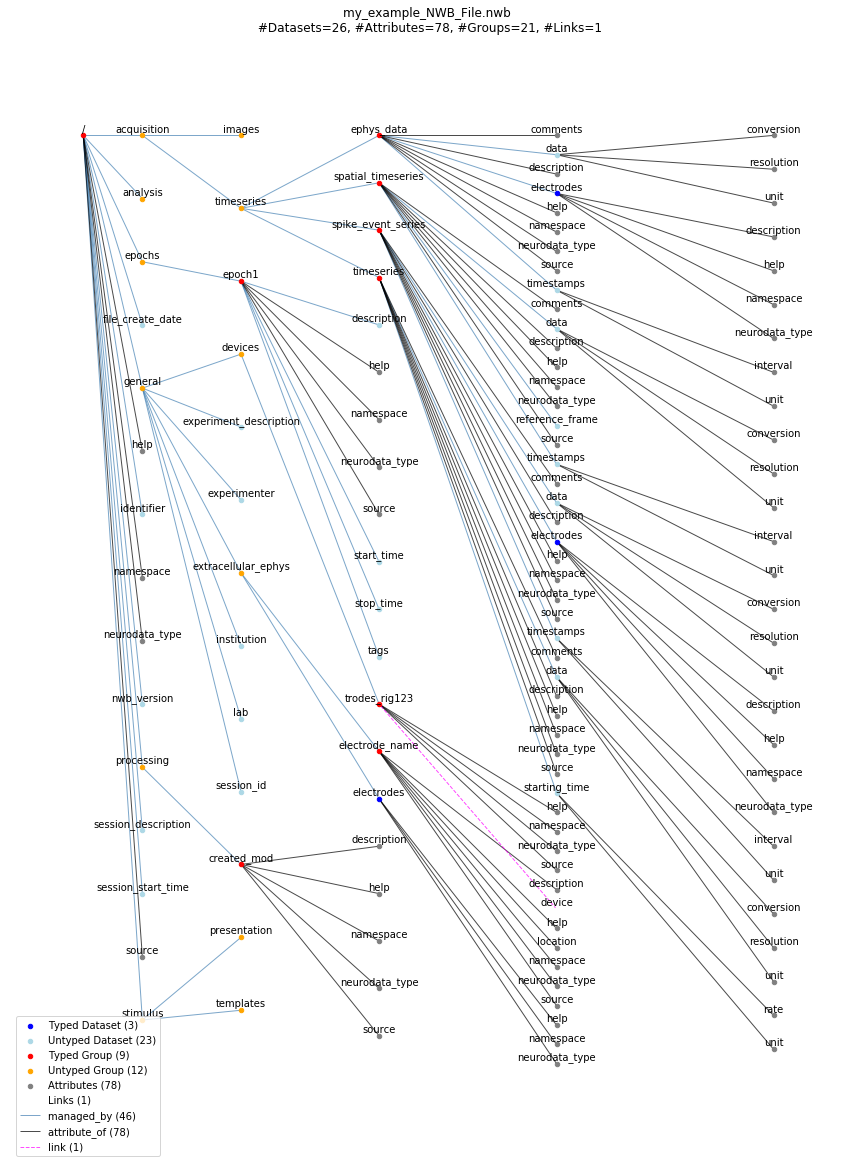

In [23]:
# Plotting settings
show_bar_plot = False    # Change setting to plot distribution of object sizes in the HDF5 file
plot_single_file = True # Plot all files
output_filenames = 'my_example_NWB_File.nwb'


print("output_filenames = ", output_filenames)
    
filenames = output_filenames
print("filenames = ", filenames)

from utils.render import HierarchyDescription, NXGraphHierarchyDescription
import matplotlib.pyplot as plt
        
file_hierarchy = HierarchyDescription.from_hdf5(filenames)
file_graph = NXGraphHierarchyDescription(file_hierarchy)          
fig = file_graph.draw(show_plot=False,
                      figsize=(12,16),
                      label_offset=(0.0, 0.0065),
                      label_font_size=10)
plot_title = filenames + " \n " + "#Datasets=%i, #Attributes=%i, #Groups=%i, #Links=%i" % (len(file_hierarchy['datasets']), len(file_hierarchy['attributes']), len(file_hierarchy['groups']), len(file_hierarchy['links']))
plt.title(plot_title)
plt.show()
        
# Show a sorted bar plot with the sizes of all datasets in the file
if show_bar_plot:
    d = {i['name']: np.prod(i['size']) for i in file_hierarchy['datasets']}
    l = [w for w in sorted(d, key=d.get, reverse=True)]
    s = [d[w] for w in l]   
    p = np.arange(len(l))   
    fig,ax = plt.subplots(figsize=(16,7))
    ax.set_title(filename)
    ax.bar(p, s, width=1, color='r')
    ax.set_xticks(p+1)  
    ax.set_xticklabels(l)  
    ax.set_yscale("log", nonposy='clip')
    fig.autofmt_xdate(bottom=0.2, rotation=90, ha='right')
    plt.show()

In [24]:
print("io.read().acquisition = ", io.read().acquisition)
print("   ")

for i in io.read().acquisition:
    print("i.__nwbfields__ = ", i.__nwbfields__)
    print("   ")
    print("i = ", i)
    print("i.timestamps_unit = ", i.timestamps_unit)
    print("i.unit = ", i.unit)    
    print("i.num_samples = ", i.num_samples)
    print("i.timestamps = ", i.timestamps)
    print("i.starting_time = ", i.starting_time)
    print("i.interval = ", i.interval)
    print("i.control = ", i.control)
    print("i.control_description = ", i.control_description)
    print("   ")
      

io.read().acquisition =  (<pynwb.ecephys.ElectricalSeries object at 0x7f5b1c543f28>, <pynwb.behavior.SpatialSeries object at 0x7f5b1c543048>, <pynwb.ecephys.SpikeEventSeries object at 0x7f5b1c543c50>, <pynwb.base.TimeSeries object at 0x7f5b1c543470>)
   
i.__nwbfields__ =  ('source', 'help', 'comments', 'description', 'data', 'resolution', 'conversion', 'unit', 'num_samples', 'timestamps', 'timestamps_unit', 'interval', 'starting_time', 'rate', 'rate_unit', 'control', 'control_description', 'ancestry', 'neurodata_type', 'help', 'electrodes')
   
i =  <pynwb.ecephys.ElectricalSeries object at 0x7f5b1c543f28>
i.timestamps_unit =  Seconds
i.unit =  volt
i.num_samples =  10
i.timestamps =  <HDF5 dataset "timestamps": shape (10,), type "<f8">
i.starting_time =  None
i.interval =  1
i.control =  None
i.control_description =  None
   
i.__nwbfields__ =  ('source', 'help', 'comments', 'description', 'data', 'resolution', 'conversion', 'unit', 'num_samples', 'timestamps', 'timestamps_unit', 'in